In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from data import train_X_list, train_y_list, test_X_list, test_y_list
from structures import DecisionTree, RandomForest
from quality import test_classifier

In [2]:
forest_size = 100
datasets = np.array(range(21))
tree_f_scores = []
random_objects_forest_f_scores = []
random_features_forest_f_scores = []

In [3]:
for dataset_index in tqdm(datasets):
    tree = DecisionTree(10)
    random_objects_forest = RandomForest(is_random_objects=True)
    random_features_forest = RandomForest(is_random_features=True)
    
    tree.fit(train_X_list[dataset_index], train_y_list[dataset_index])
    random_objects_forest.fit(train_X_list[dataset_index], train_y_list[dataset_index], forest_size)
    random_features_forest.fit(train_X_list[dataset_index], train_y_list[dataset_index], forest_size)
    
    tree_f_scores.append(test_classifier(tree, test_X_list[dataset_index], test_y_list[dataset_index]))    
    random_objects_forest_f_scores.append(
        test_classifier(random_objects_forest, test_X_list[dataset_index], test_y_list[dataset_index]))
    random_features_forest_f_scores.append(
        test_classifier(random_features_forest, test_X_list[dataset_index], test_y_list[dataset_index]))    

100%|██████████| 21/21 [11:58:17<00:00, 2052.26s/it]


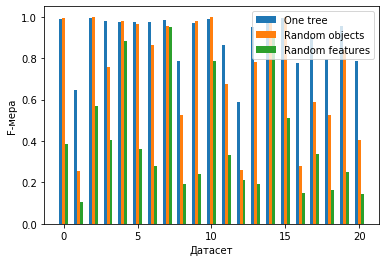

In [4]:
width = 0.2
plt.bar(datasets - width, tree_f_scores, label='One tree', width=width)
plt.bar(datasets, random_objects_forest_f_scores, label='Random objects', width=width)
plt.bar(datasets + width, random_features_forest_f_scores, label='Random features', width=width)
plt.xlabel('Датасет')
plt.ylabel('F-мера')
plt.legend()
plt.show()